In [4]:
#Importing librarires
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [6]:
data = pd.read_csv('D:/Aedifico/Machine Learning/Datasets/Attrition.csv')
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Frequently,279,R&D,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Rarely,1373,R&D,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Frequently,1392,R&D,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Rarely,591,R&D,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1273 non-null   int64 
 1   BusinessTravel            1273 non-null   object
 2   DailyRate                 1273 non-null   int64 
 3   Department                1273 non-null   object
 4   DistanceFromHome          1273 non-null   int64 
 5   Education                 1273 non-null   int64 
 6   EducationField            1273 non-null   object
 7   EnvironmentSatisfaction   1273 non-null   int64 
 8   Gender                    1273 non-null   object
 9   HourlyRate                1273 non-null   int64 
 10  JobInvolvement            1273 non-null   int64 
 11  JobLevel                  1273 non-null   int64 
 12  JobRole                   1273 non-null   object
 13  JobSatisfaction           1273 non-null   int64 
 14  MaritalStatus           

# PREPROCESSING

In [8]:
# Replacing the ordinal data with categories to avoid misinterpretation by Model as Numerical data.

Education = {1: "Below College", 2: "College", 3:"Bachelor", 4:"Master", 5:"Doctor"}
EnvironmentSatisfaction = {1: "Low", 2: "Medium", 3:"High", 4:"Very High"}
JobInvolvement = {1: "Low", 2: "Medium", 3:"High", 4:"Very High"}
JobSatisfaction = {1: "Low", 2: "Medium", 3:"High", 4:"Very High"}
PerformanceRating = {1: "Low", 2: "Good", 3:"Excellent", 4:"Outstanding"}
RelationshipSatisfaction = {1: "Low", 2: "Medium", 3:"High", 4:"Very High"}
WorkLifeBalance = {1: "Bad", 2: "Good", 3:"Better", 4:"Best"}

data.replace({"Education": Education, "JobInvolvement":JobInvolvement, "JobSatisfaction": JobSatisfaction, 
              "PerformanceRating":PerformanceRating, "RelationshipSatisfaction":RelationshipSatisfaction,
             "WorkLifeBalance":WorkLifeBalance, "EnvironmentSatisfaction":EnvironmentSatisfaction}, inplace=True)


In [9]:
data['JobLevel']=data['JobLevel'].astype('object')
data['StockOptionLevel']=data['StockOptionLevel'].astype('object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1273 non-null   int64 
 1   BusinessTravel            1273 non-null   object
 2   DailyRate                 1273 non-null   int64 
 3   Department                1273 non-null   object
 4   DistanceFromHome          1273 non-null   int64 
 5   Education                 1273 non-null   object
 6   EducationField            1273 non-null   object
 7   EnvironmentSatisfaction   1273 non-null   object
 8   Gender                    1273 non-null   object
 9   HourlyRate                1273 non-null   int64 
 10  JobInvolvement            1273 non-null   object
 11  JobLevel                  1273 non-null   object
 12  JobRole                   1273 non-null   object
 13  JobSatisfaction           1273 non-null   object
 14  MaritalStatus           

In [11]:
#summary statistics
data.describe(include='number')

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,36.789474,810.999214,9.087981,66.423409,6505.249018,14332.047918,2.684211,15.226237,11.214454,2.822467,6.854674,4.205813,2.117046,4.085625
std,9.124901,399.043555,8.080965,20.297643,4733.084557,7078.508182,2.475200,3.677319,7.764541,1.298850,5.923392,3.649123,3.151764,3.546598
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,477.000000,2.000000,49.000000,2899.000000,8053.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,812.000000,7.000000,67.000000,4908.000000,14382.000000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,84.000000,8346.000000,20431.000000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000


In [12]:
categoricalCols = [col for col in data.columns if data[col].dtype=='object']
for i in categoricalCols:
    print(str(data[i].value_counts()))
    print()

target = data.Attrition
# Columns with only one value for all rows, Columns with unique values per row and target column are dropped
predictors = data.drop(['Attrition'], axis=1)
predictors.head()

#Separating the Categorical and Numerical data for further analysis.
categoricalCols = [col for col in predictors.columns if predictors[col].dtype=='object']
predictorsCategorical = predictors[categoricalCols]

numericCols = predictors.columns.difference(categoricalCols)
predictorsNumerical = predictors[numericCols]

Rarely        902
Frequently    233
Non-Travel    138
Name: BusinessTravel, dtype: int64

R&D      852
Sales    377
HR        44
Name: Department, dtype: int64

Bachelor         500
Master           337
College          250
Below College    146
Doctor            40
Name: Education, dtype: int64

Life Sciences      532
Medical            411
Marketing          134
Technical          111
Other               68
Human Resources     17
Name: EducationField, dtype: int64

High         407
Very High    373
Medium       250
Low          243
Name: EnvironmentSatisfaction, dtype: int64

Male      764
Female    509
Name: Gender, dtype: int64

High         753
Medium       324
Very High    127
Low           69
Name: JobInvolvement, dtype: int64

1    475
2    461
3    185
4     94
5     58
Name: JobLevel, dtype: int64

Sales Executive              271
Research Scientist           260
Laboratory Technician        230
Manufacturing Director       125
Healthcare Representative    116
Manager         

In [13]:
num_data = pd.concat([predictorsNumerical.reset_index(drop=True),target],axis=1)
num_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')

In [14]:
cat_data = pd.concat([predictorsCategorical.reset_index(drop=True),target],axis=1)
cat_data.columns

Index(['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'WorkLifeBalance', 'Attrition'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

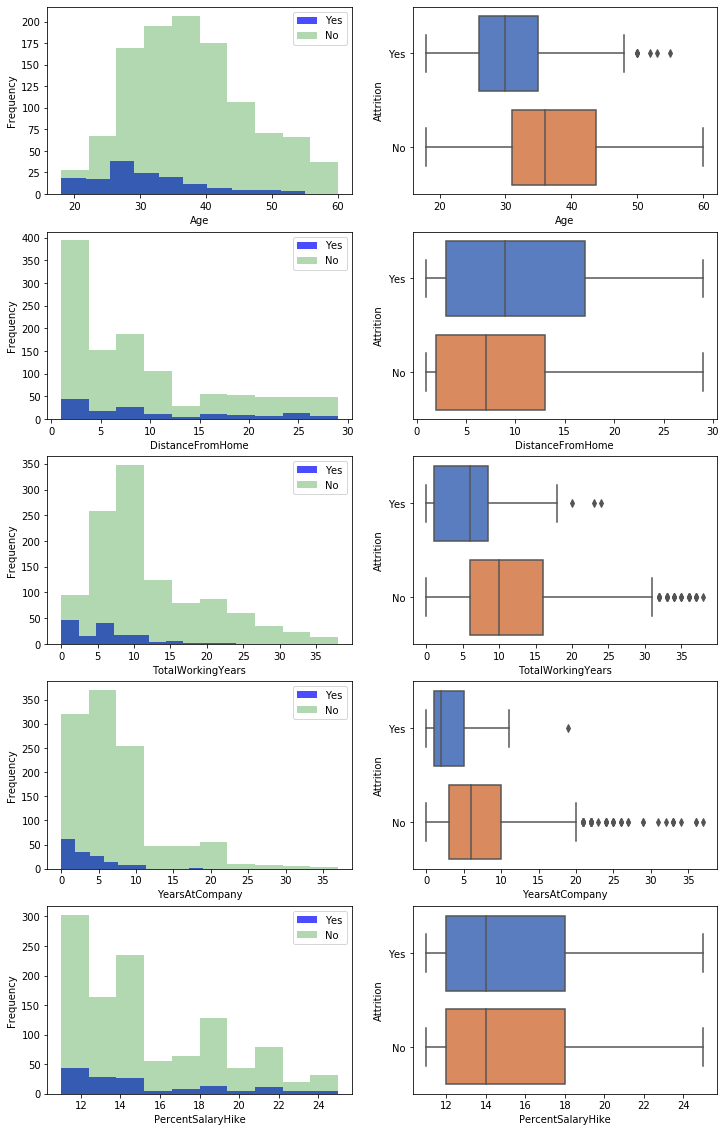

In [15]:
#Numerical data
fig, axarr = plt.subplots(5,2,figsize=(12, 20))

# Age vs Attrition - Most attrition is at lower age
num_data[num_data['Attrition']=='Yes']['Age'].plot.hist(
    ax=axarr[0][0], alpha = 0.7, lw=3, color= 'b', label='Yes'
)
num_data[num_data['Attrition']=='No']['Age'].plot.hist(
    ax=axarr[0][0],  alpha = 0.3, lw=3, color= 'g', label='No'
)
axarr[0][0].set_xlabel("Age")
axarr[0][0].legend()
sns.boxplot(x='Age', y="Attrition", data=num_data, ax=axarr[0][1], palette="muted")


# TotalWorkingYears vs Attrition -- More ttrition in initial years
num_data[num_data['Attrition']=='Yes']['TotalWorkingYears'].plot.hist(
    ax=axarr[2][0], alpha = 0.7, lw=3, color= 'b', label='Yes'

)
num_data[num_data['Attrition']=='No']['TotalWorkingYears'].plot.hist(
    ax=axarr[2][0], alpha = 0.3, lw=3, color= 'g', label='No'
)
axarr[2][0].set_xlabel("TotalWorkingYears")
axarr[2][0].legend()
sns.boxplot(x='TotalWorkingYears', y="Attrition", data=num_data, ax=axarr[2][1], palette="muted")


# DistanceFromHome vs Attrition -- attrition at larger distances from home
num_data[num_data['Attrition']=='Yes']['DistanceFromHome'].plot.hist(
    ax=axarr[1][0], alpha = 0.7, lw=3, color= 'b', label='Yes'

)
num_data[num_data['Attrition']=='No']['DistanceFromHome'].plot.hist(
    ax=axarr[1][0], alpha = 0.3, lw=3, color= 'g', label='No'
)
axarr[1][0].set_xlabel("DistanceFromHome")
axarr[1][0].legend()
sns.boxplot(x='DistanceFromHome', y="Attrition", data=num_data, ax=axarr[1][1], palette="muted")


# YearsAtCompany vs Attrition -- Leave at younger age, but there are many outliers indicating that people leave at other ages also
num_data[num_data['Attrition']=='Yes']['YearsAtCompany'].plot.hist(
    ax=axarr[3][0], alpha = 0.7, lw=3, color= 'b', label='Yes'

)
num_data[num_data['Attrition']=='No']['YearsAtCompany'].plot.hist(
    ax=axarr[3][0], alpha = 0.3, lw=3, color= 'g', label='No'
)
axarr[3][0].set_xlabel("YearsAtCompany")
axarr[3][0].legend()
sns.boxplot(x='YearsAtCompany', y="Attrition", data=num_data, ax=axarr[3][1], palette="muted")

# PercentSalaryHike vs Attrition -- No effect
num_data[num_data['Attrition']=='Yes']['PercentSalaryHike'].plot.hist(
    ax=axarr[4][0], alpha = 0.7, lw=3, color= 'b', label='Yes'
)
num_data[num_data['Attrition']=='No']['PercentSalaryHike'].plot.hist(
    ax=axarr[4][0],  alpha = 0.3, lw=3, color= 'g', label='No'
)
axarr[4][0].set_xlabel("PercentSalaryHike")
axarr[4][0].legend()
sns.boxplot(x='PercentSalaryHike', y="Attrition", data=num_data, ax=axarr[4][1], palette="muted")

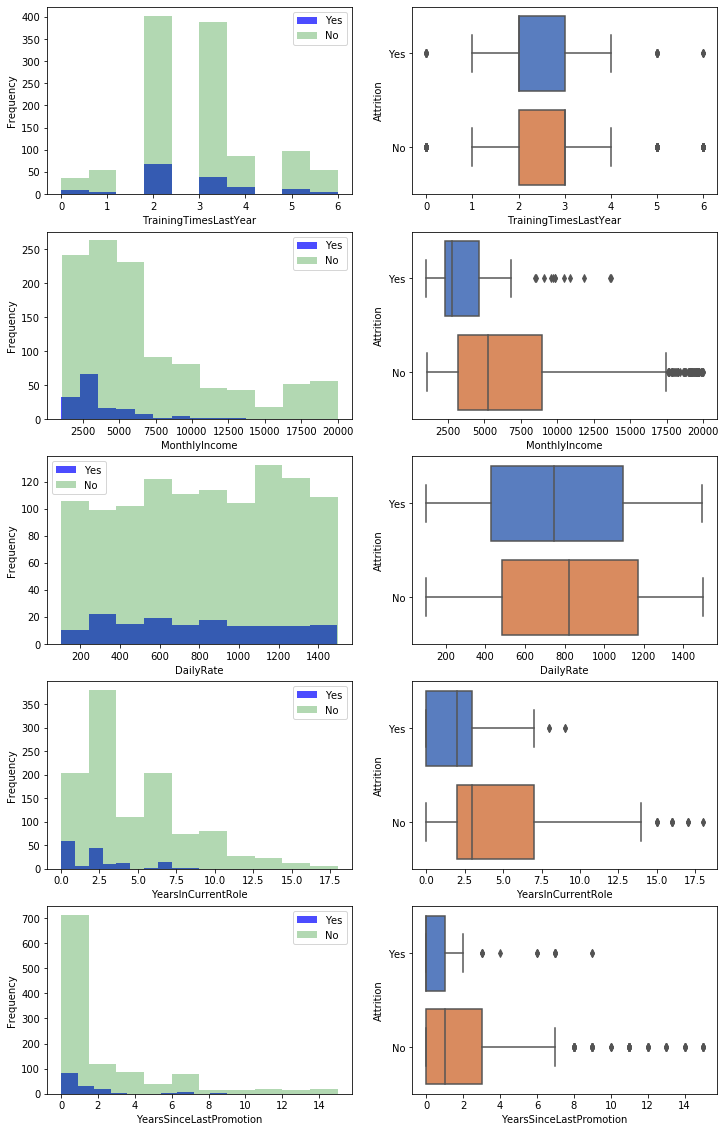

In [16]:
fig, axarr = plt.subplots(5,2, figsize=(12, 20))

# TrainingTimesLastYear vs Attrition -- No Effect
num_data[num_data['Attrition']=='Yes']['TrainingTimesLastYear'].plot.hist(
    ax=axarr[0][0], alpha = 0.7, lw=3, color= 'b', label='Yes'
)
num_data[num_data['Attrition']=='No']['TrainingTimesLastYear'].plot.hist(
    ax=axarr[0][0],  alpha = 0.3, lw=3, color= 'g', label='No'
)
axarr[0][0].set_xlabel("TrainingTimesLastYear")
axarr[0][0].legend()
sns.boxplot(x='TrainingTimesLastYear', y="Attrition", data=num_data, ax=axarr[0][1], palette="muted")

# MonthlyIncome vs Attrition -- Attrition at lower income
num_data[num_data['Attrition']=='Yes']['MonthlyIncome'].plot.hist(
    ax=axarr[1][0], alpha = 0.7, lw=3, color= 'b', label='Yes'

)
num_data[num_data['Attrition']=='No']['MonthlyIncome'].plot.hist(
    ax=axarr[1][0], alpha = 0.3, lw=3, color= 'g', label='No'
)
axarr[1][0].set_xlabel("MonthlyIncome")
axarr[1][0].legend()
sns.boxplot(x='MonthlyIncome', y="Attrition", data=num_data, ax=axarr[1][1], palette="muted")

#DailyRate vs Attrition -- No effect
num_data[num_data['Attrition']=='Yes']['DailyRate'].plot.hist(
    ax=axarr[2][0], alpha = 0.7, lw=3, color= 'b', label='Yes'

)
num_data[num_data['Attrition']=='No']['DailyRate'].plot.hist(
    ax=axarr[2][0], alpha = 0.3, lw=3, color= 'g', label='No'
)
axarr[2][0].set_xlabel("DailyRate")
axarr[2][0].legend()
sns.boxplot(x='DailyRate', y="Attrition", data=num_data, ax=axarr[2][1], palette="muted")

#YearsInCurrentRole vs Attrition -- More attrition in lesser years
num_data[num_data['Attrition']=='Yes']['YearsInCurrentRole'].plot.hist(
    ax=axarr[3][0], alpha = 0.7, lw=3, color= 'b', label='Yes'

)
num_data[num_data['Attrition']=='No']['YearsInCurrentRole'].plot.hist(
    ax=axarr[3][0], alpha = 0.3, lw=3, color= 'g', label='No'
)
axarr[3][0].set_xlabel("YearsInCurrentRole")
axarr[3][0].legend()
sns.boxplot(x='YearsInCurrentRole', y="Attrition", data=num_data, ax=axarr[3][1], palette="muted")

# YearsSinceLastPromotion vs Attrition -- Less attrition for people promoted later
num_data[num_data['Attrition']=='Yes']['YearsSinceLastPromotion'].plot.hist(
    ax=axarr[4][0], alpha = 0.7, lw=3, color= 'b', label='Yes'
)
num_data[num_data['Attrition']=='No']['YearsSinceLastPromotion'].plot.hist(
    ax=axarr[4][0],  alpha = 0.3, lw=3, color= 'g', label='No'
)
axarr[4][0].set_xlabel("YearsSinceLastPromotion")
axarr[4][0].legend()
sns.boxplot(x='YearsSinceLastPromotion', y="Attrition", data=num_data, ax=axarr[4][1], palette="muted")

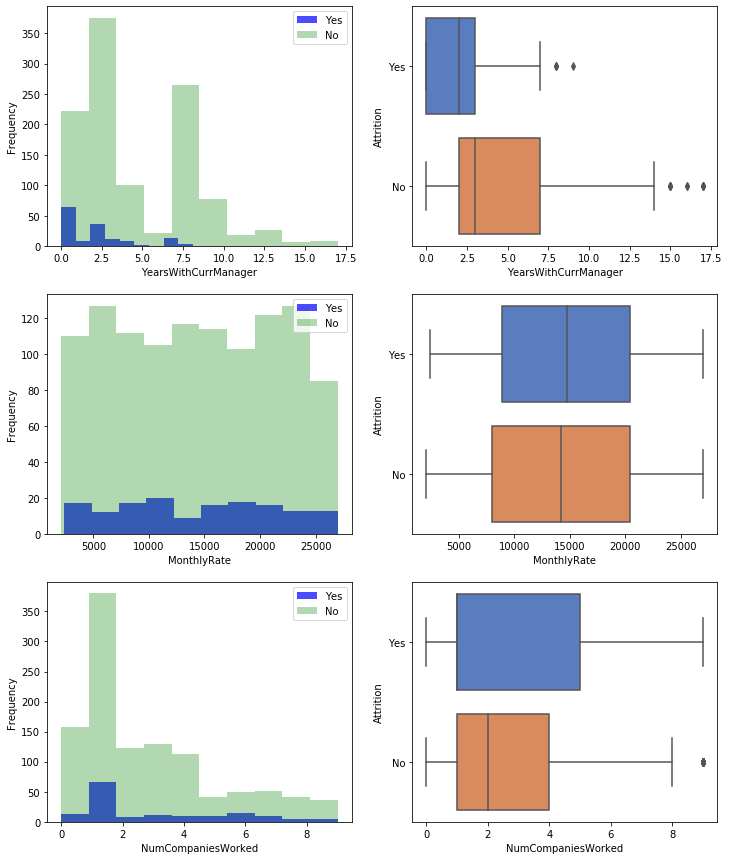

In [17]:
fig, axarr = plt.subplots(3,2, figsize=(12, 15))

# YearsWithCurrManager vs Attrition -- Higher attrition in lesser years
num_data[num_data['Attrition']=='Yes']['YearsWithCurrManager'].plot.hist(
    ax=axarr[0][0], alpha = 0.7, lw=3, color= 'b', label='Yes'
)
num_data[num_data['Attrition']=='No']['YearsWithCurrManager'].plot.hist(
    ax=axarr[0][0],  alpha = 0.3, lw=3, color= 'g', label='No'
)
axarr[0][0].set_xlabel("YearsWithCurrManager")
axarr[0][0].legend()
sns.boxplot(x='YearsWithCurrManager', y="Attrition", data=num_data, ax=axarr[0][1], palette="muted")

# MonthlyRate vs Attrition -- No effect
num_data[num_data['Attrition']=='Yes']['MonthlyRate'].plot.hist(
    ax=axarr[1][0], alpha = 0.7, lw=3, color= 'b', label='Yes'

)
num_data[num_data['Attrition']=='No']['MonthlyRate'].plot.hist(
    ax=axarr[1][0], alpha = 0.3, lw=3, color= 'g', label='No'
)
axarr[1][0].set_xlabel("MonthlyRate")
axarr[1][0].legend()
sns.boxplot(x='MonthlyRate', y="Attrition", data=num_data, ax=axarr[1][1], palette="muted")

#NumCompaniesWorked vs Attrition -- Higher attrition for people working in lesser no. of companies
num_data[num_data['Attrition']=='Yes']['NumCompaniesWorked'].plot.hist(
    ax=axarr[2][0], alpha = 0.7, lw=3, color= 'b', label='Yes'

)
num_data[num_data['Attrition']=='No']['NumCompaniesWorked'].plot.hist(
    ax=axarr[2][0], alpha = 0.3, lw=3, color= 'g', label='No'
)
axarr[2][0].set_xlabel("NumCompaniesWorked")
axarr[2][0].legend()
sns.boxplot(x='NumCompaniesWorked', y="Attrition", data=num_data, ax=axarr[2][1], palette="muted")

Remove PercentSalaryHike, TrainingTimeLastYear, DailyRate and Monthly Rate

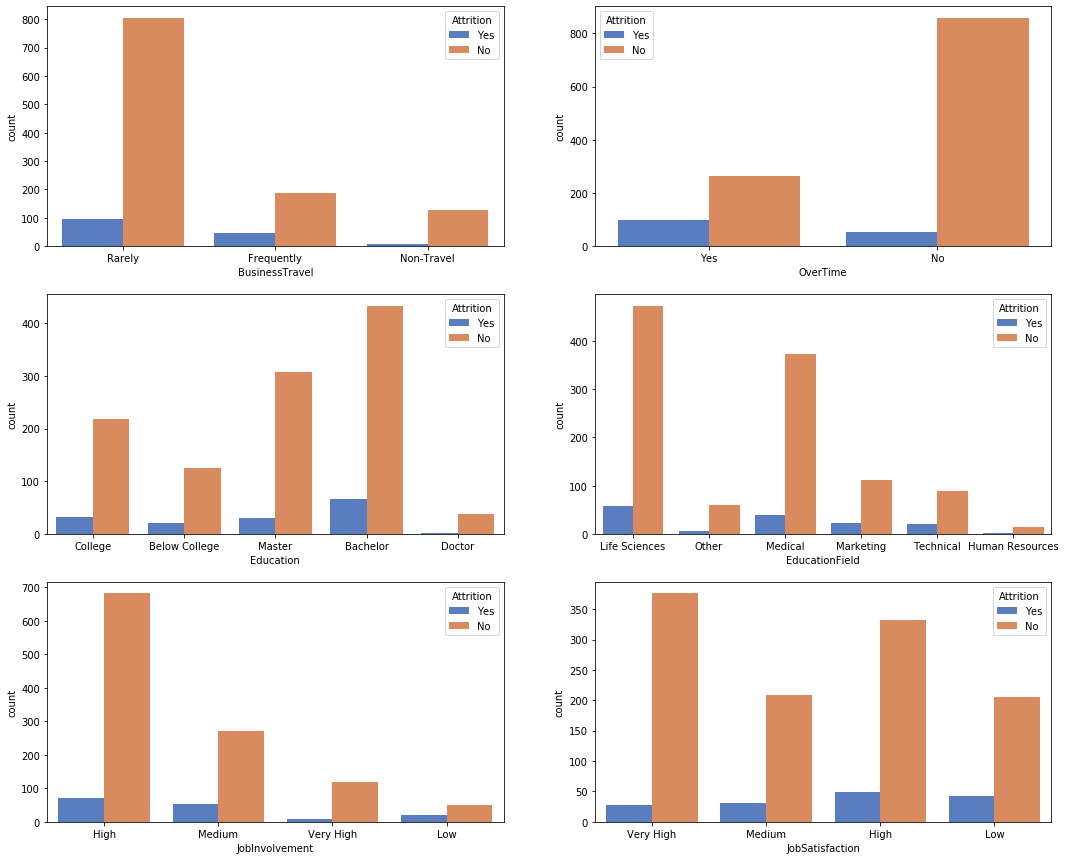

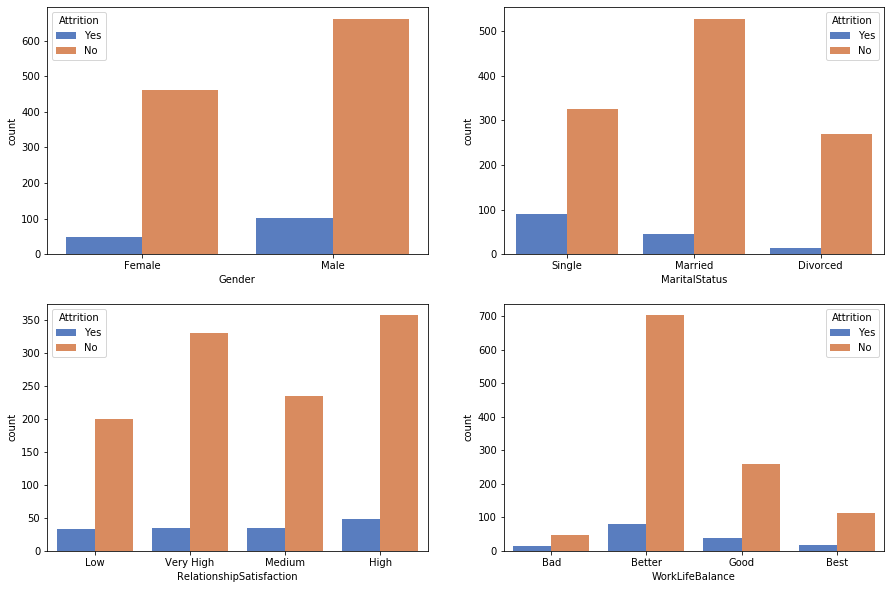

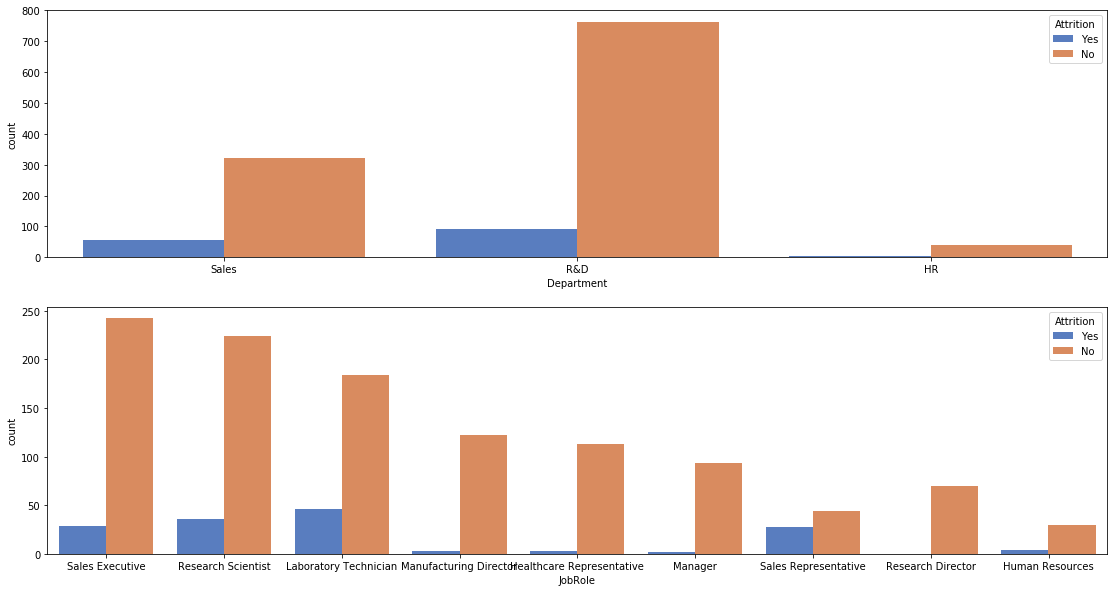

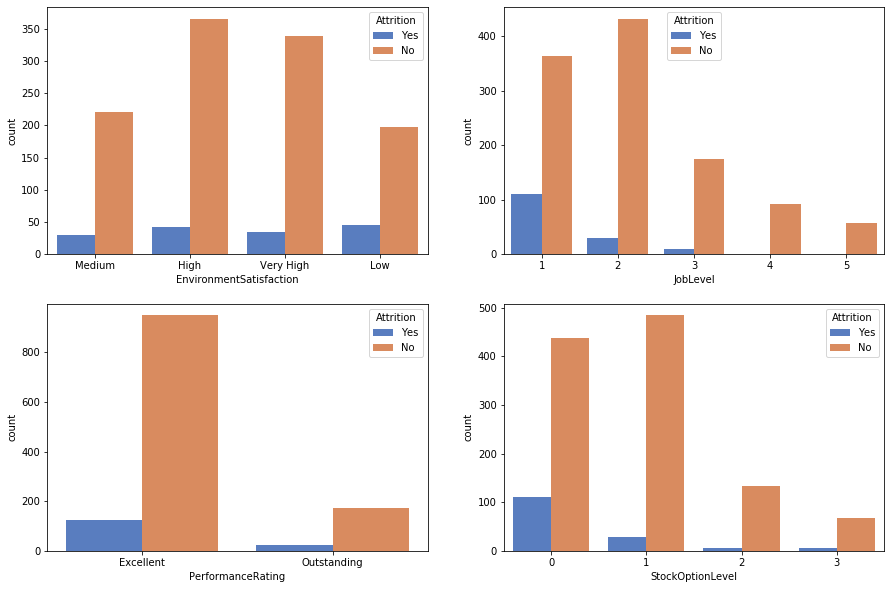

In [18]:
#Categorical Data

fig, axarr = plt.subplots(3, 2, figsize=(18, 15))
sns.countplot(x="BusinessTravel", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[0][0],palette="muted") 
# Higher attrition in travel Frequently

sns.countplot(x="OverTime", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[0][1],palette="muted")
# Higher attrition in Overtime

sns.countplot(x="Education", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[1][0],palette="muted")
#Higher attrition for lower levels of education

sns.countplot(x="EducationField", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[1][1],palette="muted")
# Higher percentage attrition in merketing and tech degree

sns.countplot(x="JobInvolvement", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[2][0],palette="muted")
#Attrition decreases as level of involvement decreases

sns.countplot(x="JobSatisfaction", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[2][1],palette="muted")
# Extremely low attrition in Very High Job satisfaction, higher attrition in "High" vs ["Very High and "Medium"]

fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(x="Gender", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[0][0],palette="muted")
#Higher attrition for males

sns.countplot(x="MaritalStatus", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[0][1],palette="muted")
# More attrition among single people

sns.countplot(x="RelationshipSatisfaction", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[1][0],palette="muted")
# More attrition among people with low relationship satisfaction

sns.countplot(x="WorkLifeBalance", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[1][1],palette="muted")
# High attrition among people with bad Work Life Balance, even though very few people have reported bad worklife balance

fig, axarr = plt.subplots(2, figsize=(19, 10))
# Higher percentage attrition in Sales

sns.countplot(x="Department", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[0],palette="muted")
#Higher attrition in R&D and sales

sns.countplot(x="JobRole", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[1],palette="muted")
#Higher attrition in Sales roles, Lab technician role and research scientist

fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(x="EnvironmentSatisfaction", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[0][0],palette="muted")
#No effect

sns.countplot(x="JobLevel", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[0][1],palette="muted")
# More attrition among single people

sns.countplot(x="PerformanceRating", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[1][0],palette="muted")
# More attrition with people having excellent rating

sns.countplot(x="StockOptionLevel", hue = "Attrition",dodge= True ,data=cat_data, ax=axarr[1][1],palette="muted")
# Higher attrition with low stock option levels      

Remove EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction

In [19]:
#Removing unnecesary variables based on EDA
#PercentSalaryHike, TrainingTimeLastYear, DailyRate and Monthly Rate
predictorsNumerical = predictorsNumerical[['Age', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                                           'NumCompaniesWorked', 'TotalWorkingYears','YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
predictorsNumerical

,Age,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,94,5993,8,8,6,4,0,5
1,49,8,61,5130,1,10,10,7,1,7
2,37,2,92,2090,6,7,0,0,0,0
3,33,3,56,2909,1,8,8,7,3,0
4,27,2,40,3468,9,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
1268,26,5,30,2966,0,5,4,2,0,0
1269,36,23,41,2571,4,17,5,2,0,3
1270,27,4,87,6142,1,6,6,2,0,3
1271,49,2,63,5390,2,17,9,6,0,8


In [20]:
predictorsCategorical = predictorsCategorical[['BusinessTravel', 'Department', 'Education', 'EducationField', 'PerformanceRating', 'Gender', 'JobInvolvement', 'JobLevel',
                                               'JobRole', 'MaritalStatus', 'OverTime','StockOptionLevel','WorkLifeBalance']]
predictorsCategorical

,BusinessTravel,Department,Education,EducationField,PerformanceRating,Gender,JobInvolvement,JobLevel,JobRole,MaritalStatus,OverTime,StockOptionLevel,WorkLifeBalance
0,Rarely,Sales,College,Life Sciences,Excellent,Female,High,2,Sales Executive,Single,Yes,0,Bad
1,Frequently,R&D,Below College,Life Sciences,Outstanding,Male,Medium,2,Research Scientist,Married,No,1,Better
2,Rarely,R&D,College,Other,Excellent,Male,Medium,1,Laboratory Technician,Single,Yes,0,Better
3,Frequently,R&D,Master,Life Sciences,Excellent,Female,High,1,Research Scientist,Married,Yes,0,Better
4,Rarely,R&D,Below College,Medical,Excellent,Male,High,1,Laboratory Technician,Married,No,1,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Rarely,Sales,Bachelor,Other,Excellent,Female,Medium,1,Sales Representative,Single,No,0,Better
1269,Frequently,R&D,College,Medical,Excellent,Male,Very High,2,Laboratory Technician,Married,No,1,Better
1270,Rarely,R&D,Bachelor,Life Sciences,Outstanding,Male,Very High,2,Manufacturing Director,Married,Yes,1,Better
1271,Frequently,Sales,Bachelor,Medical,Excellent,Male,Medium,2,Sales Executive,Married,No,0,Good


# FEATURE ENGINEERING

# Feature Selection - Correlation Heatmap

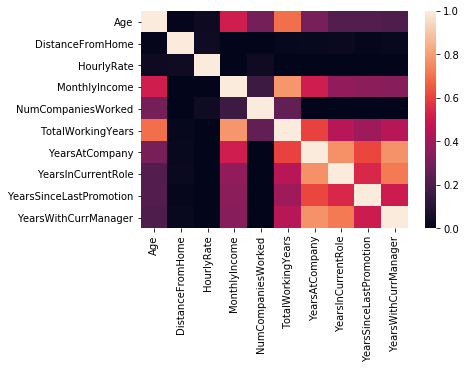

In [21]:
#Correlation Plot
corr = predictorsNumerical.corr()
heatmap = sns.heatmap(corr, vmin=0, vmax=1)

In [22]:
#Removing variables for treating multi-collinearity
predictorsNumerical=predictorsNumerical.drop(['YearsAtCompany','YearsWithCurrManager'],axis=1)

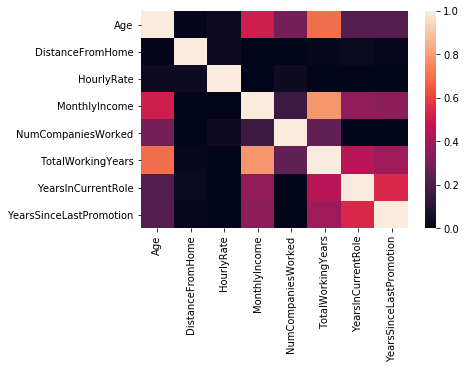

In [23]:
#Correlation Plot
corr = predictorsNumerical.corr()
heatmap = sns.heatmap(corr, vmin=0, vmax=1)

# Feature Transformation - Binning

In [24]:
WorkingYears = pd.qcut(predictorsNumerical['TotalWorkingYears'], q=5)
WorkingYears.value_counts()

(5.0, 8.0]       274
(-0.001, 5.0]    271
(8.0, 10.0]      261
(17.0, 38.0]     244
(10.0, 17.0]     223
Name: TotalWorkingYears, dtype: int64

In [25]:
bin_labels_5 = ['Very Less Experience', 'Less Experience', 'Managerial Experience', 'High Experience', 'Very High Experience']
predictorsCategorical['Experience'] = pd.qcut(predictorsNumerical['TotalWorkingYears'],
                              q=5, labels=bin_labels_5)
predictorsNumerical=predictorsNumerical.drop(['TotalWorkingYears'],axis=1)

Removing YearsatCompany, YearsWithCurrManager and TotalWorkingYears to tackle multicollinearity,
Transforming TotalWorkingYears into categorical variable by binning

# Feature Transformation - Dummies

In [26]:
predictors = pd.concat([predictorsCategorical.reset_index(drop=True),predictorsNumerical.reset_index(drop=True)],axis=1)

# One hot encoding Categorical and Ordinal Variables
predictorsCategorical_encoded  = pd.get_dummies(predictorsCategorical,drop_first=True)

# Encoding Target to binary 0 & 1

number = LabelEncoder()
y = number.fit_transform(target.astype('str'))

X = pd.concat([predictorsCategorical_encoded.reset_index(drop=True),predictorsNumerical.reset_index(drop=True)],axis=1)
X.shape

(1273, 50)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   BusinessTravel_Non-Travel         1273 non-null   uint8
 1   BusinessTravel_Rarely             1273 non-null   uint8
 2   Department_R&D                    1273 non-null   uint8
 3   Department_Sales                  1273 non-null   uint8
 4   Education_Below College           1273 non-null   uint8
 5   Education_College                 1273 non-null   uint8
 6   Education_Doctor                  1273 non-null   uint8
 7   Education_Master                  1273 non-null   uint8
 8   EducationField_Life Sciences      1273 non-null   uint8
 9   EducationField_Marketing          1273 non-null   uint8
 10  EducationField_Medical            1273 non-null   uint8
 11  EducationField_Other              1273 non-null   uint8
 12  EducationField_Technical          

# Feature Selection - VIF

In [28]:
def calc_vif(features):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif.to_csv("VIF.csv")
    return vif

calc_vif(X)

,variables,VIF
0,BusinessTravel_Non-Travel,1.627480
1,BusinessTravel_Rarely,4.892485
2,Department_R&D,97.168194
3,Department_Sales,53.690001
4,Education_Below College,1.371647
5,Education_College,1.563592
6,Education_Doctor,1.124738
7,Education_Master,1.790484
8,EducationField_Life Sciences,52.624539
9,EducationField_Marketing,14.822211


In [31]:
X = X.drop(['Department_R&D','Department_Sales','EducationField_Life Sciences','EducationField_Marketing',
            'EducationField_Medical','EducationField_Technical','JobLevel_4','JobLevel_5','JobRole_Sales Executive',
            'WorkLifeBalance_Better','Age','HourlyRate','MonthlyIncome'],axis=1)
X

,BusinessTravel_Non-Travel,BusinessTravel_Rarely,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Other,PerformanceRating_Outstanding,Gender_Male,JobInvolvement_Low,...,WorkLifeBalance_Best,WorkLifeBalance_Good,Experience_Less Experience,Experience_Managerial Experience,Experience_High Experience,Experience_Very High Experience,DistanceFromHome,NumCompaniesWorked,YearsInCurrentRole,YearsSinceLastPromotion
0,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,8,4,0
1,0,0,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,8,1,7,1
2,0,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,2,6,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,3,1,7,3
4,0,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,2,9,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,5,0,2,0
1269,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,23,4,2,0
1270,0,1,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,4,1,2,0
1271,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,2,2,6,0


Removing dummy variables with VIF > 10

# Feature Selection - p-values

In [32]:
results = sm.Logit(y,X).fit()

results.pvalues[results.pvalues < 0.05].index

         Current function value: 0.192920
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Rarely',
       'Education_Below College', 'Gender_Male', 'JobInvolvement_Low',
       'JobInvolvement_Medium', 'JobLevel_2', 'JobLevel_3',
       'JobRole_Human Resources', 'JobRole_Manufacturing Director',
       'JobRole_Research Scientist', 'OverTime_Yes', 'StockOptionLevel_1',
       'StockOptionLevel_2', 'StockOptionLevel_3',
       'Experience_High Experience', 'Experience_Very High Experience',
       'DistanceFromHome', 'NumCompaniesWorked', 'YearsInCurrentRole'],
      dtype='object')

Removing insignificant p-values on the basis of logit model. So, keeping variables with p-value < 0.05

In [33]:
cols = ['BusinessTravel_Non-Travel', 'BusinessTravel_Rarely',
       'Education_Below College', 'Gender_Male', 'JobInvolvement_Low',
       'JobInvolvement_Medium', 'JobLevel_2', 'JobLevel_3',
       'JobRole_Human Resources', 'JobRole_Manufacturing Director',
       'JobRole_Research Scientist', 'OverTime_Yes', 'StockOptionLevel_1',
       'StockOptionLevel_2', 'StockOptionLevel_3',
       'Experience_High Experience', 'Experience_Very High Experience',
       'DistanceFromHome', 'NumCompaniesWorked', 'YearsInCurrentRole']
X=X[cols]
X.shape

(1273, 20)

# Imbalanced Data

In [35]:
# Stratified cross validation for imbalanced data (70:30)  140/60
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    train_X, val_X = X.iloc[train_index], X.iloc[test_index]
    train_y, val_y = y[train_index], y[test_index]

TRAIN: [   1    2    3 ... 1269 1271 1272] TEST: [   0   13   18   19   21   31   44   47   51   59   62   67   70   78
   80   81   83   90   91   92  100  103  116  122  123  128  130  131
  133  139  145  146  155  157  162  167  173  176  181  189  191  196
  201  203  209  214  224  228  235  240  243  246  247  251  257  266
  269  273  279  281  289  296  301  304  306  307  309  315  324  336
  341  342  351  361  365  368  369  379  386  391  392  405  427  428
  429  436  443  445  449  454  457  460  476  477  480  483  484  490
  497  500  501  502  505  507  510  512  515  520  522  523  529  530
  533  544  546  550  569  607  610  612  620  622  624  629  634  635
  638  646  648  656  660  666  672  674  676  681  685  689  691  702
  703  705  708  711  719  723  725  726  731  735  740  744  746  755
  756  757  762  763  765  785  790  795  805  807  809  813  817  821
  822  828  832  838  840  842  848  851  863  866  873  875  876  888
  891  897  898  899  901  9

# PREDICTIVE MODELLING

In [36]:
#Logistic Regression
model1 = LogisticRegression()
model1.fit(train_X, train_y)
predicted = model1.predict(val_X)

print("Accuracy : "+ str(accuracy_score(predicted, val_y)))
print("Precision : "+str(precision_score(predicted, val_y)))
print("Recall : "+str(recall_score(predicted, val_y)))
print("F1-Score : "+str(f1_score(predicted, val_y)))
print("Confusion Matrix :")
print(confusion_matrix(predicted, val_y))

Accuracy : 0.8858267716535433
Precision : 0.3
Recall : 0.5294117647058824
F1-Score : 0.3829787234042553
Confusion Matrix :
[[216  21]
 [  8   9]]


In [37]:
#Naive Bayes

model2 = BernoulliNB ()
model2.fit(train_X, train_y)
predicted = model2.predict(val_X)

print("Accuracy : "+ str(accuracy_score(predicted, val_y)))
print("Precision : "+str(precision_score(predicted, val_y)))
print("Recall : "+str(recall_score(predicted, val_y)))
print("F1-Score : "+str(f1_score(predicted, val_y)))
print("Confusion Matrix :")
print(confusion_matrix(predicted, val_y))

Accuracy : 0.9133858267716536
Precision : 0.3333333333333333
Recall : 0.8333333333333334
F1-Score : 0.47619047619047616
Confusion Matrix :
[[222  20]
 [  2  10]]


In [38]:
#Decision Tree

model3 = DecisionTreeClassifier(criterion ="gini",min_samples_leaf=10,max_depth=20)
model3.fit(train_X, train_y)
predicted = model3.predict(val_X)
print("Accuracy : "+ str(accuracy_score(predicted, val_y)))
print("Precision : "+str(precision_score(predicted, val_y)))
print("Recall : "+str(recall_score(predicted, val_y)))
print("F1-Score : "+str(f1_score(predicted, val_y)))
print("Confusion Matrix :")
print(confusion_matrix(predicted, val_y))

Accuracy : 0.905511811023622
Precision : 0.3333333333333333
Recall : 0.7142857142857143
F1-Score : 0.4545454545454545
Confusion Matrix :
[[220  20]
 [  4  10]]


In [39]:
#Random Forest

forest_model = RandomForestClassifier(n_estimators = 5, random_state = 0, max_features=5)
forest_model.fit(train_X, train_y)
predicted = forest_model.predict(val_X)
print("Accuracy : "+ str(accuracy_score(predicted, val_y)))
print("Precision : "+str(precision_score(predicted, val_y)))
print("Recall : "+str(recall_score(predicted, val_y)))
print("F1-Score : "+str(f1_score(predicted, val_y)))
print("Confusion Matrix :")
print(confusion_matrix(predicted, val_y))

Accuracy : 0.8937007874015748
Precision : 0.3333333333333333
Recall : 0.5882352941176471
F1-Score : 0.42553191489361697
Confusion Matrix :
[[217  20]
 [  7  10]]


# Variable Importance

Comparing various metrics from Confusion Matrix, Random Forest is the best model. So, sorting variables on the basis of their importance in predicting atttrition

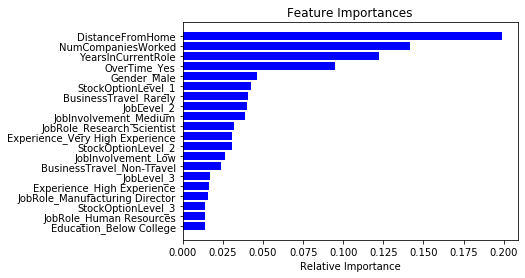

In [41]:
#Varoable Importance Plot
features=X.columns
importances = forest_model.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [43]:
#Variable Importance Scores
import operator
imp_dict = {X.columns[i]:imp for i,imp in enumerate(forest_model.feature_importances_)}
sorted_imp_dict = sorted(imp_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_imp_dict

[('DistanceFromHome', 0.19878267281859194),
 ('NumCompaniesWorked', 0.14157314638766738),
 ('YearsInCurrentRole', 0.12237350808297132),
 ('OverTime_Yes', 0.09488743513150073),
 ('Gender_Male', 0.04593739776359355),
 ('StockOptionLevel_1', 0.042408298894695266),
 ('BusinessTravel_Rarely', 0.040467701420830796),
 ('JobLevel_2', 0.04010501066657479),
 ('JobInvolvement_Medium', 0.03897179433889922),
 ('JobRole_Research Scientist', 0.03206066031210606),
 ('Experience_Very High Experience', 0.03054355463986467),
 ('StockOptionLevel_2', 0.030459501272601285),
 ('JobInvolvement_Low', 0.02659250866510776),
 ('BusinessTravel_Non-Travel', 0.02373408423347765),
 ('JobLevel_3', 0.017216484525056894),
 ('Experience_High Experience', 0.016156513520093587),
 ('JobRole_Manufacturing Director', 0.015777139577366848),
 ('StockOptionLevel_3', 0.014085402831041576),
 ('JobRole_Human Resources', 0.014036284554477765),
 ('Education_Below College', 0.013830900363480902)]